## Introduction

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
## spcial query to get access to all table info from the special "SQLITE_MASTER" table 
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [2]:
pd.read_sql_query(q1, conn) #DataFrame

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn) #DataFrame

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

In [4]:
q3 = """
SELECT MIN(population) AS min_pop, MAX(population) AS max_pop,
MIN(population_growth) AS min_pop_growth, 
MAX(population_growth) AS max_pop_growth
FROM facts
"""
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


## Outliers

In [5]:
q4 = "SELECT * FROM facts WHERE population = (\
SELECT MIN(population) FROM facts)"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
q5 = q4 = "SELECT * FROM facts WHERE population = (\
SELECT MAX(population) FROM facts)"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [7]:
import warnings
warnings.filterwarnings(action="ignore")
"""
UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
"""

'\nUserWarning: To output multiple subplots, the figure containing the passed axes is being cleared\n  exec(code_obj, self.user_global_ns, self.user_ns)\n'

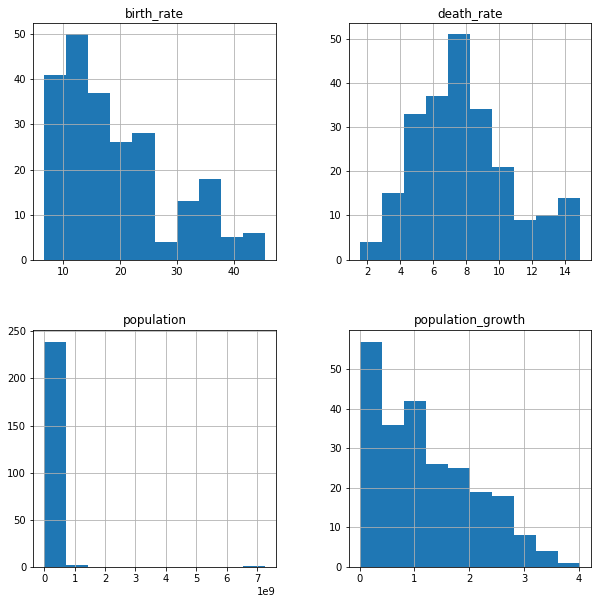

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = "SELECT population, population_growth, birth_rate, death_rate \
FROM facts WHERE name != 'Antarctica' OR name != 'World'"
pd.read_sql_query(q6, conn).hist(ax=ax);

# Which Countries have the highest population density?

In [9]:
q7 = "SELECT name, CAST(population as float)/CAST(area as float) AS density \
FROM facts ORDER BY density DESC LIMIT 20"
df = pd.read_sql_query(q7, conn)
df

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


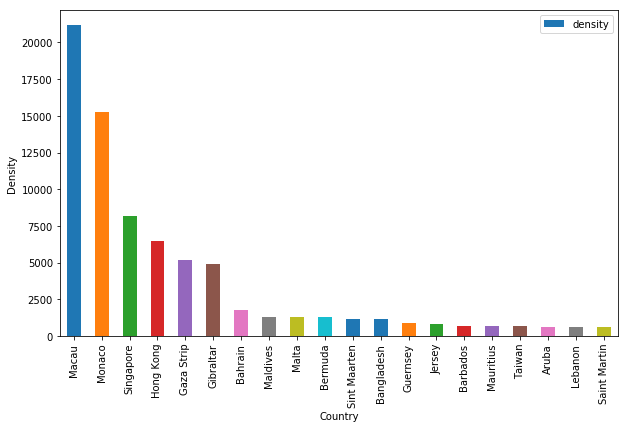

In [10]:
ax = df.plot(kind='bar', x='name', y='density', figsize=(10,6))
ax.set_ylabel('Density');
ax.set_xlabel('Country');